In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qubit import qubit
import numpy as np
import plot_functions as pf
# from instrument_init import init_sa


2024-04-04 16:07:08,035 - qm - INFO     - Starting session: eab0f98d-783e-476c-81c7-41219906e363


# Initialize qubit

In [8]:
qb = qubit('q1-testing')

Loading parameter JSON file
Adding X90_len = 80 to pars
Adding AWG_trigger_out = 1 to pars
Adding Qin = 2 to pars
Adding analog_input_gain = 3 to pars
Adding X180_amp = 0.45 to pars
Adding smearing = 40 to pars
Adding readout_freq = 6200000000.0 to pars
Adding Iout = {'qubit': 3, 'rr': 1} to pars
Adding X180_len = 160 to pars
Adding saturation_duration = 2500 to pars
Adding Qc = 9000 to pars
Adding Qout = {'qubit': 4, 'rr': 2} to pars
Adding arb_op_len = 160 to pars
Adding readout_pulse_len_in_clk = 500 to pars
Adding resettime = {'qubit': 25000, 'rr': 1250} to pars
Adding elements = ['qubit', 'rr'] to pars
Adding controller = con2 to pars
Adding readout_len = 2000 to pars
Adding kappa = 200000.0 to pars
Adding Iin = 1 to pars
Adding X90_amp = 0.45 to pars
Adding operations = {'qubit': ['const', 'gauss', 'arb_op', 'X180', 'Y180', 'X90', 'Y90'], 'rr': ['const', 'readout']} to pars
Adding Q = 9000 to pars
Adding switch_weights = False to pars
Removing ffl_mixer_offsets_on from pars
Remov

KeyError: 'ffl_mixer_offsets_on'

# Time of flight

In [ ]:
qb.update_value('rr_atten',0)
# qb.update_value('tof',56)
qb.update_value('n_avg',5000)
qb.update_value('rr_IF',260e6)
qb.update_value('readout_length',1000)
qb.tof_cal(update_tof=False)

In [ ]:
qb.update_value('rr_IF',260e6)  ##readout freq found out from the VNA

## Update LO

In [ ]:
qb.update_value('rr_LO',6.4e9)
# qb.get_power(fc=qb.pars['rr_LO'],threshold=-20,span=1e6,config=True,plot=True)
qb.opt_lo_leakage(mode='coarse',element='rr',freq_span=0.5e6,threshold=-20,plot=True)

In [ ]:
qb.opt_lo_leakage(mode='fine',element='rr',freq_span=0.5e6,threshold=-50,plot=True)

# Optimizing sideband

In [ ]:
qb.opt_sideband(mode='coarse',element='rr',sa_span=0.5e6,threshold=-20,plot=True)

In [ ]:
qb.opt_sideband(mode='fine',element='rr',sa_span=0.5e6,threshold=-50,plot=True)

# Resonator spectroscopy

In [4]:
qb.update_value('rr_IF',50e6)

Updating rr_IF to 50000000.0


In [6]:
qb.config['mixers']

{'qubit': [{'intermediate_frequency': 32900000,
   'lo_frequency': 4480000000,
   'correction': [1.0, 0.0, 0.0, 1.0]}],
 'rr': [{'intermediate_frequency': 50000000.0,
   'lo_frequency': 6400000000.0,
   'correction': [1.0124290976623946,
    -0.10214765651828614,
    -0.101581741523725,
    1.0180693711869762]}],
 'ffl': [{'intermediate_frequency': 0,
   'lo_frequency': 6550000000.0,
   'correction': [1.0, 0.0, 0.0, 1.0]}],
 'qubit12': [{'intermediate_frequency': 80000000,
   'lo_frequency': 4480000000,
   'correction': [1.0, 0.0, 0.0, 1.0]}],
 'fflqc': [{'intermediate_frequency': 0,
   'lo_frequency': 2480000000,
   'correction': [1.0, 0.0, 0.0, 1.0]}]}

Updating readout_length to 2000
Updating rr_resettime to 8000
Updating n_avg to 5000
Updating readout_atten to 30
Setting DA attenuation to 30.
Updating rr_LO to 6400000000.0
Setting readout LO to 6.4 GHz
Setting readout_LO frequency to 6400000000.0.
2024-04-04 16:09:15,828 - qm - INFO     - Performing health check
2024-04-04 16:09:15,841 - qm - INFO     - Health check passed
2024-04-04 16:09:16,180 - qm - INFO     - Sending program to QOP for compilation
2024-04-04 16:09:16,262 - qm - INFO     - Executing program


4999it [00:06, 810.67it/s]                         


Resonant Frequency: 6.45800 GHz
FWHM = 65.0 MHz
kappa = 408.407 MHz


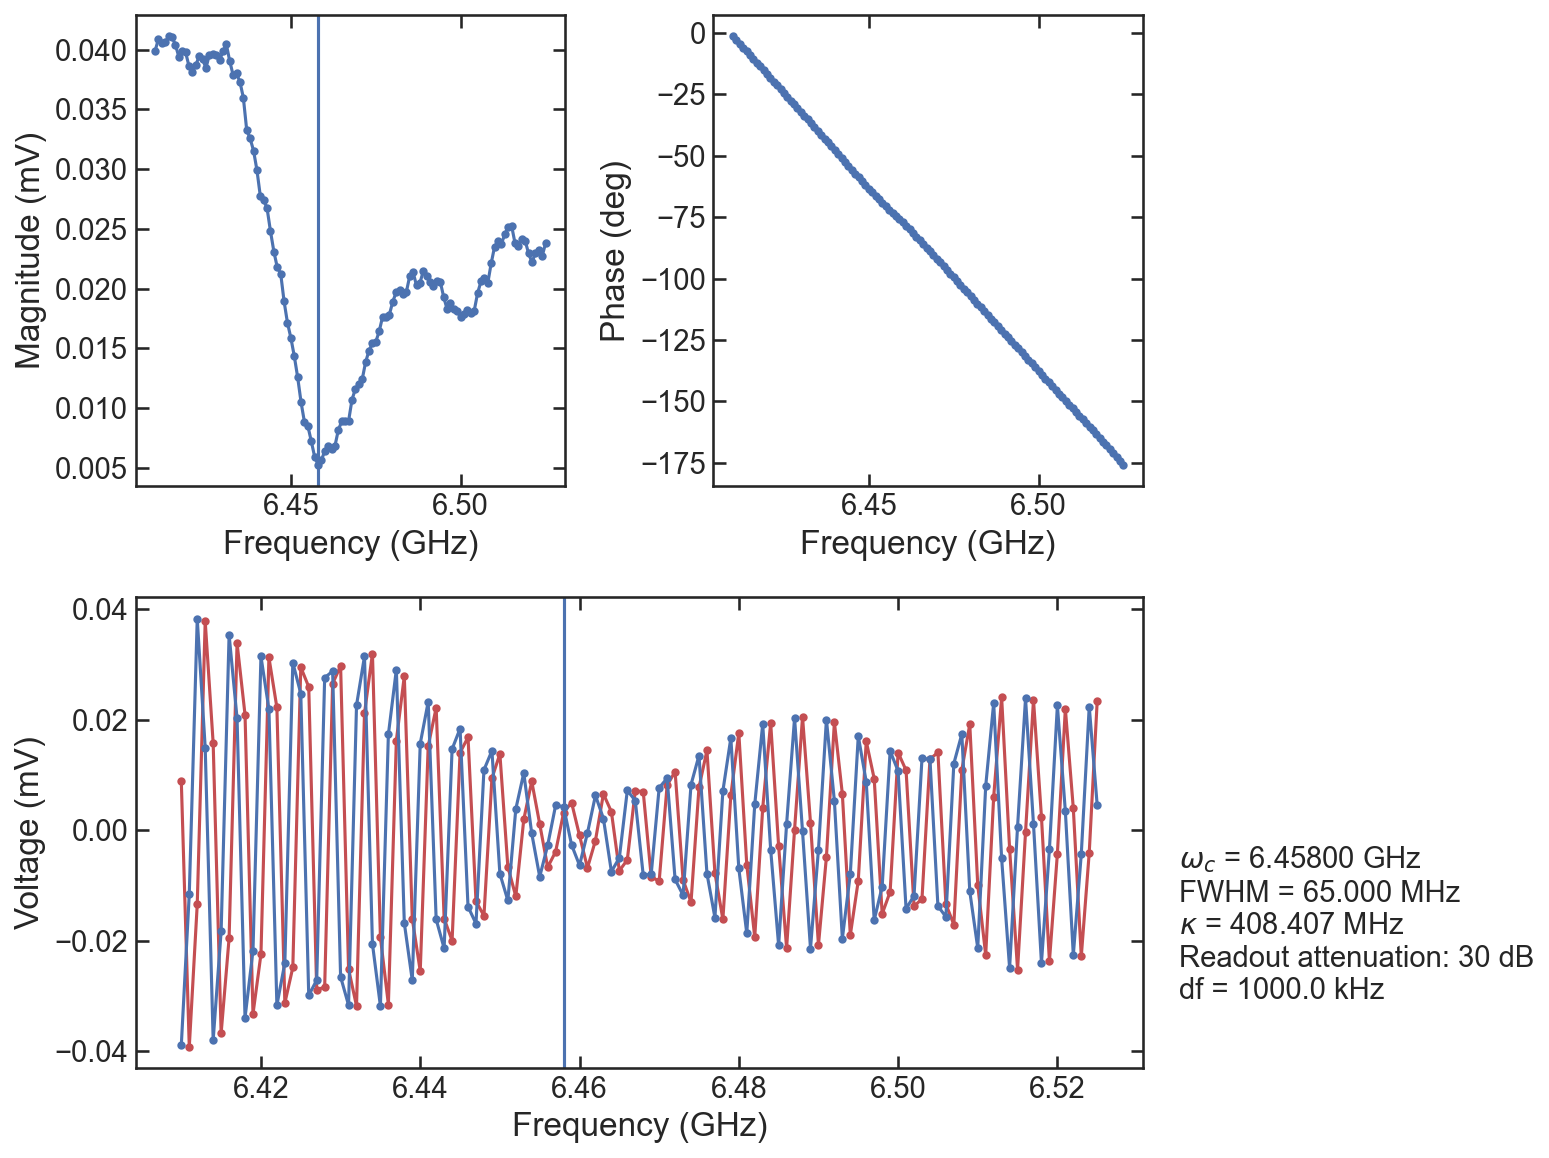

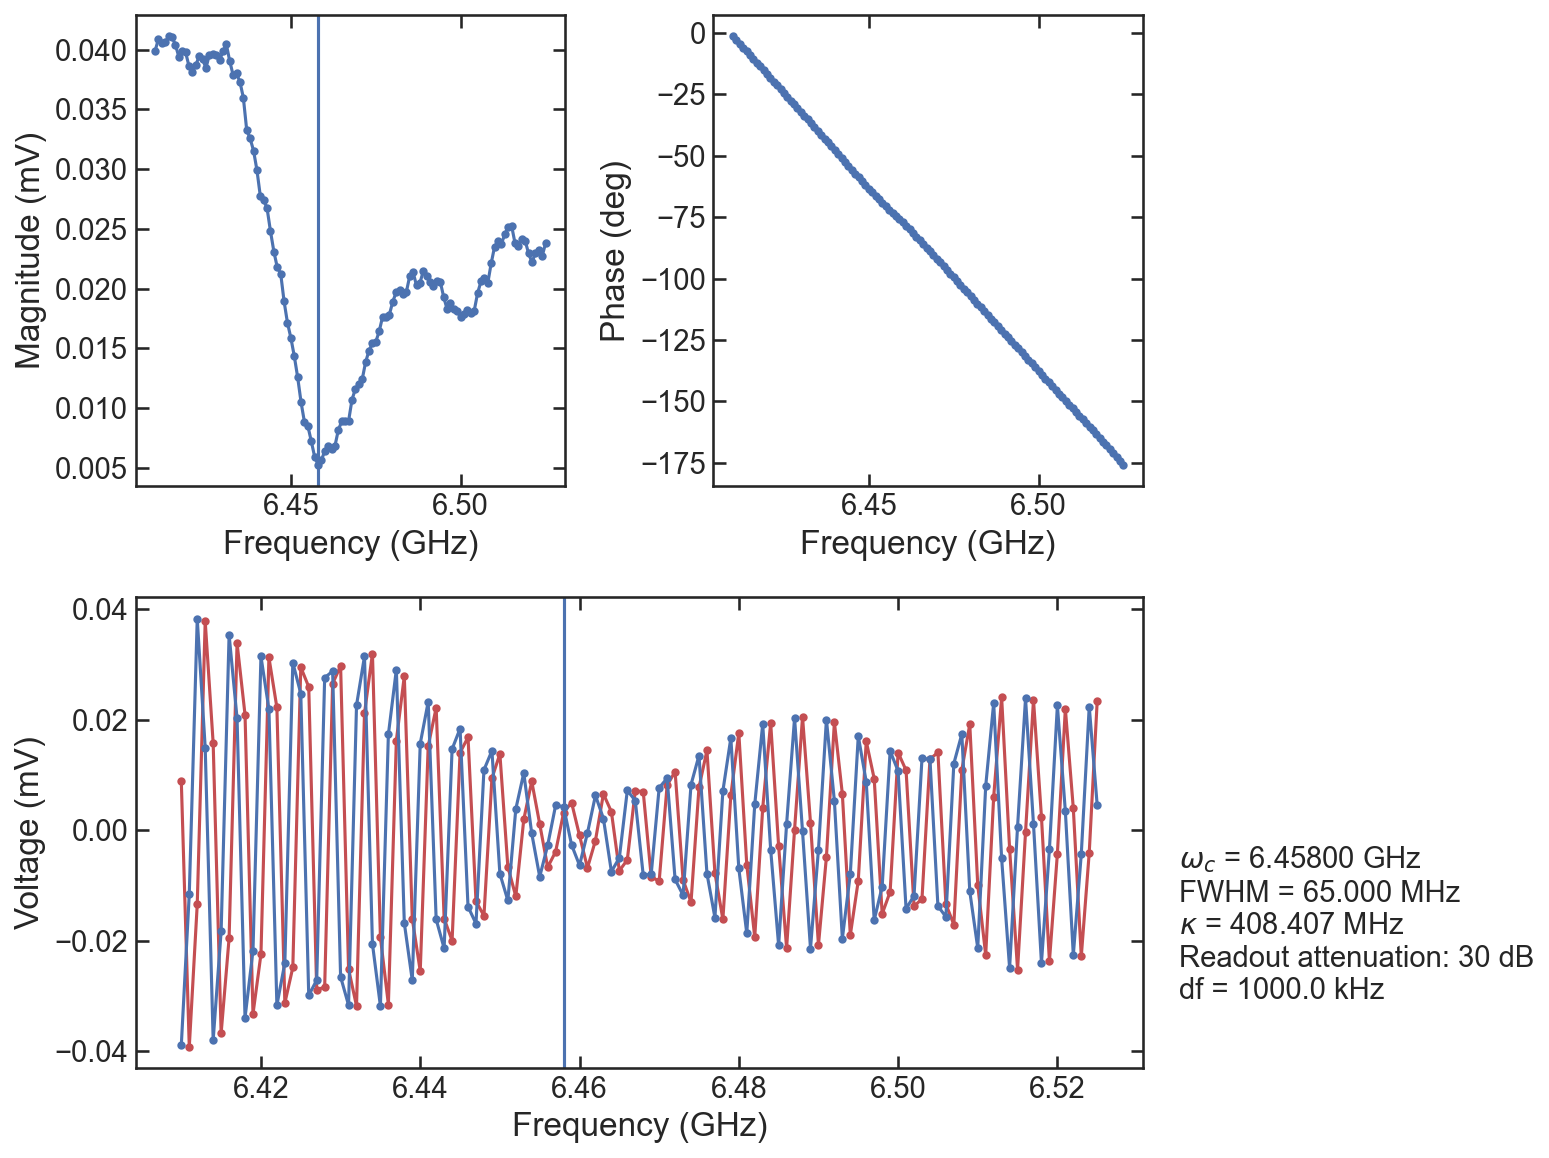

In [7]:
qb.update_value('readout_length', 2000)   ##wanted a clearer peak
qb.update_value('rr_resettime',8000)
qb.update_value('n_avg',5000)
qb.update_value('readout_atten',30)
df = 1e6
qb.experiment = 'resonator_spec'
##added a 10db fixed attenuator on rr line after the spiltter and just before fridge input
I,Q, freqs, job, iteration = qb.resonator_spec(IF_min = 10e6,
                       f_LO = 6.4e9,
                       IF_max = 125e6,
                       df = df,
                       fit=True,
                       savedata=False,
                       showprogress=True)

fc,fwhm = pf.fit_res(freqs,np.abs(I+1j*Q))
pf.spec_plot(freqs,I,Q,attenuation=qb.pars['readout_atten'],df=df,iteration=iteration,element='resonator',fwhm=fwhm,fc=fc)

# Qubit Punchout

In [ ]:
qb.punchout( df = 1e6,
                 IF_min = 10e6,
                 IF_max = 125e6,
                 n_avg = 5000,
                 atten_range = [0,50],
                 atten_step = 2,
                 f_LO = [6.4e9],
                 res_ringdown_time = int(5e3))


In [ ]:
qb.run_scan(df = 0.1e6,
                 n_avg = 500,
                 element='resonator',
                 check_mixers=False,
                 chunksize = 200e6,
                 attenuation=20,
                 lo_min = 6e9,
                 lo_max = 7e9,
                 amp_q_scaling = 1,
                 saturation_dur = 20e3,
                 showprogress=False, 
                 res_ringdown_time = 4e3,
                 plot=True, flux=0)